In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'product_info_with_allergens.csv'
df = pd.read_csv(file_path)

# Preprocess the allergen_info column: treat 'No known allergens' as NaN
df['allergen_info'] = df['allergen_info'].replace("['No known allergens']", np.nan)

# Calculate average ratings and loves count for products with and without allergens
average_data = {
    'Allergen Status': ["No Known Allergens", "With Allergens"],
    'Average Rating': [
        df[df['allergen_info'].isna()]['rating'].mean(),
        df[df['allergen_info'].notna()]['rating'].mean()
    ],
    'Average Loves Count': [
        df[df['allergen_info'].isna()]['loves_count'].mean(),
        df[df['allergen_info'].notna()]['loves_count'].mean()
    ]
}

# Create a DataFrame for better visualization
average_df = pd.DataFrame(average_data)
average_df = average_df.round(2)

print(average_df)


      Allergen Status  Average Rating  Average Loves Count
0  No Known Allergens            4.16             35197.91
1      With Allergens            4.22             24707.49


<ipython-input-8-f395632178db>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Allergen Status', y='Average Rating', data=average_df, ax=ax1, palette='pastel', alpha=0.8)


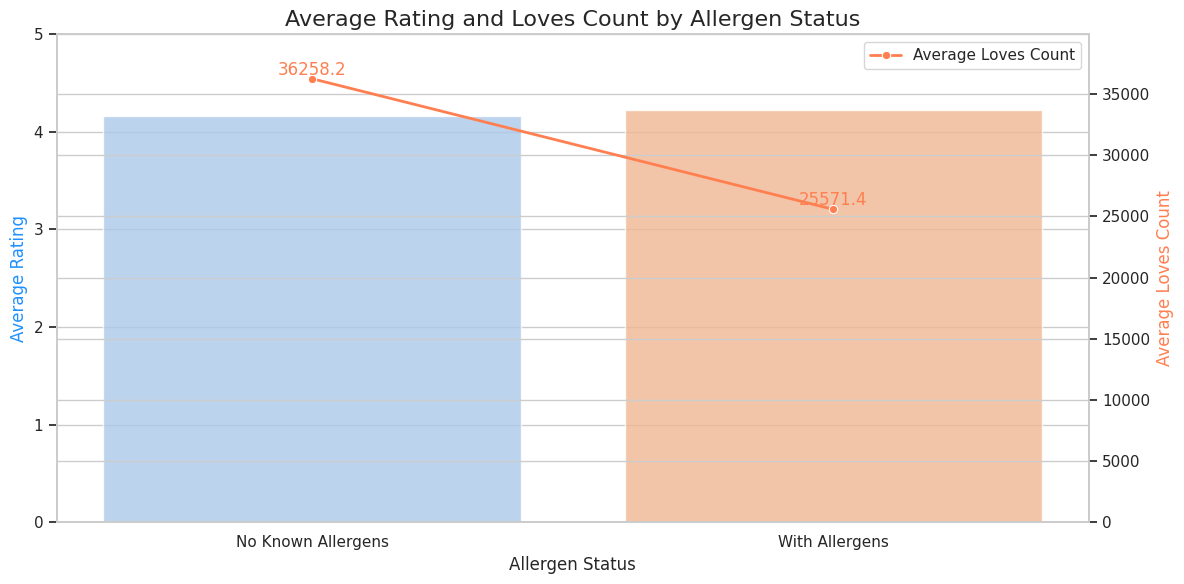

In [8]:
# Calculate average ratings and loves count for products with and without allergens
average_data = {
    'Allergen Status': ["No Known Allergens", "With Allergens"],
    'Average Rating': [
        df[df['allergen_info'].isna()]['rating'].mean(),
        df[df['allergen_info'].notna()]['rating'].mean()
    ],
    'Average Loves Count': [
        df[df['allergen_info'].isna()]['loves_count'].mean(),
        df[df['allergen_info'].notna()]['loves_count'].mean()
    ]
}

# Create a DataFrame for better visualization
average_df = pd.DataFrame(average_data)
average_df = average_df.round(2)

# Set the aesthetics for seaborn
sns.set(style='whitegrid')

# Create a figure and axes for the plots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create bar plot for average ratings
sns.barplot(x='Allergen Status', y='Average Rating', data=average_df, ax=ax1, palette='pastel', alpha=0.8)
ax1.set_ylabel('Average Rating', color='dodgerblue')
ax1.set_ylim(0, 5)
ax1.set_title('Average Rating and Loves Count by Allergen Status', fontsize=16)

# Create a second y-axis for the loves count
ax2 = ax1.twinx()

# Create line plot for average loves count
sns.lineplot(x='Allergen Status', y='Average Loves Count', data=average_df, ax=ax2, marker='o', color='coral', linewidth=2, label='Average Loves Count')
ax2.set_ylabel('Average Loves Count', color='coral')
ax2.set_ylim(0, average_df['Average Loves Count'].max() * 1.1)  # add some padding

# Add annotations for average loves count
for i in range(len(average_df)):
    ax2.text(i, average_df['Average Loves Count'][i], round(average_df['Average Loves Count'][i], 2), color='coral', ha='center', va='bottom')

# Adjust layout for better appearance
fig.tight_layout()
plt.show()


In [9]:
# Identify vegan products
vegan_mask = df['highlights'].str.contains('vegan', case=False, na=False)

# Check allergen status for vegan products
total_vegan = vegan_mask.sum()
correctly_classified = df[vegan_mask & df['allergen_info'].isna()].shape[0]
misclassified = total_vegan - correctly_classified

# Calculate percentages
correctly_classified_pct = (correctly_classified / total_vegan) * 100
misclassified_pct = (misclassified / total_vegan) * 100

# Create summary table
summary_data = {
    'Metric': ['Total Vegan Products', 'Correctly Classified (No Known Allergens)', 'Misclassified (Potential Allergens)'],
    'Count': [total_vegan, correctly_classified, misclassified],
    'Percentage': [100, correctly_classified_pct, misclassified_pct]
}

summary_df = pd.DataFrame(summary_data)

print(summary_df)


                                      Metric  Count  Percentage
0                       Total Vegan Products   2549  100.000000
1  Correctly Classified (No Known Allergens)   1183   46.410357
2        Misclassified (Potential Allergens)   1366   53.589643
